In [60]:
from PIL import Image
from pycocotools.coco import COCO
import matplotlib.pyplot as plt
import requests

In [61]:
dataDir = '../annotations/annotations_trainval2014'
dataType = 'val2014'
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco = COCO(annFile)

loading annotations into memory...
Done (t=0.77s)
creating index...
index created!


In [62]:
img_ids =  [5476]

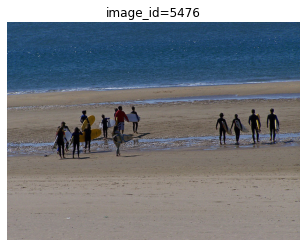

In [65]:
for img_id in img_ids:
    url = coco.imgs[img_id]['coco_url']
    raw_img = Image.open(requests.get(url, stream=True).raw)
    plt.axis('off')
    plt.title(f"image_id={img_id}")
    plt.imshow(raw_img)
plt.savefig(f"{img_id}.png")

In [14]:
test = {'a':1, 'b':2, 'c':3}
list(test.keys())[:2]

['a', 'b']

***

In [4]:
import sys
sys.path.insert(0, '/mnt/c/Users/jiyun/Desktop/Jiyu/2020-2021/Winter/CSC413 - Neural Networks and Deep Learnin/Final Project/Image-Captioning-Reproduction/nearest-neighbor')
from feature_extraction import ImageFeature
from caption_generation import CaptionGenerator

In [5]:
from torchvision.datasets import CocoCaptions
from pycocoevalcap.eval import COCOEvalCap
from PIL import Image
import matplotlib.pyplot as plt
import random

In [6]:
load_knn = "../nearest-neighbor/knn-models/knn_k=100_num_20000"
train_ann_file = "../annotations/annotations_trainval2014/annotations/captions_train2014.json" 
valid_ann_file = "../annotations/annotations_trainval2014/annotations/captions_val2014.json" 

coco_dataset = CocoCaptions(
    root="../data/train2014/train2014", 
    annFile= train_ann_file
)
val_dataset = CocoCaptions(
    root="../data/val2014/val2014", 
    annFile=valid_ann_file
)
sample_imgs = []
sample_img_ids = []
for i in range(8):
    idx = random.choice(range(len(val_dataset)))
    img_id = val_dataset.ids[idx]
    sample_img_ids.append(img_id)
    img, caps = val_dataset[idx]
    sample_imgs.append(img)
    
k = int(load_knn.split("knn_k=")[-1].split("_num")[0])
train_early_stop = int(load_knn.split("_num_")[-1])
res_file = f"./results/val2014_k={k}_num_{train_early_stop}_results"
capgen = CaptionGenerator(coco_dataset, k=k, early_stop=train_early_stop, load_knn=load_knn)

loading annotations into memory...
Done (t=0.60s)
creating index...
index created!
loading annotations into memory...
Done (t=0.31s)
creating index...
index created!


In [35]:
import glob

In [46]:
sample_imgs = glob.glob("../nearest-neighbor/sample-imgs/test/*")
sample_img_ids = []
for img_path in sample_imgs:
    sample_img_ids.append(int(img_path.split("_")[-1].split(".jpg")[0]))

In [45]:
best_captions = capgen.get_captions(sample_img_paths)

In [48]:
best_captions

['A boy on a skateboard in the  middle of the street.',
 'A young man holding a baseball bat on top of a field.',
 'A group of people sitting around a table with glasses of wine.',
 'A blue and white train sitting on top of train tracks.',
 'Three black cows standing next to each other on a field.',
 'An airplane is in an upward position in the sky.',
 'A man standing in a living room in front of a TV.',
 'a close up of a laptop on a desk with a mouse']

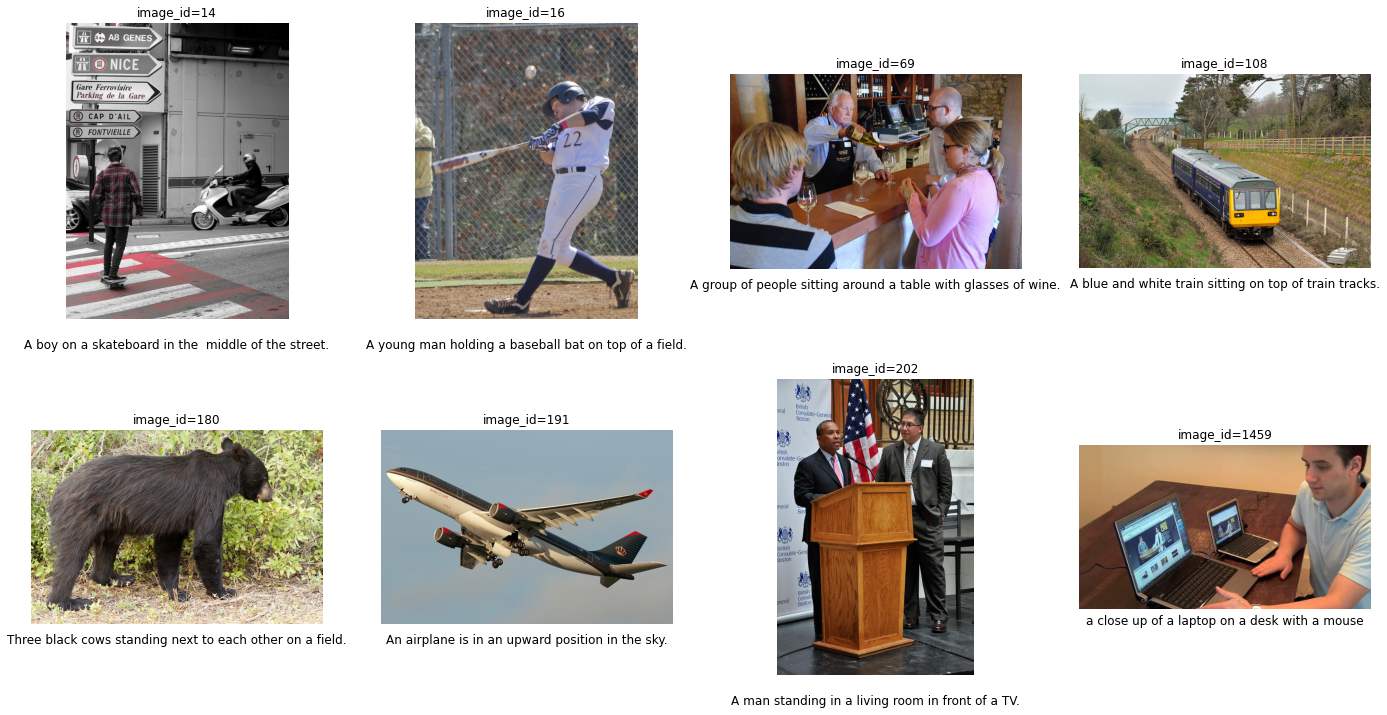

In [56]:
fig,axes = plt.subplots(nrows = 2, ncols = 4, figsize=(24, 12))

for ax in axes.flatten():
    ax.axis('off')

##edit this line to include your own image ids
for i, ax in enumerate(axes.flatten()):
    img = Image.open(sample_imgs[i])
    img_id = sample_img_ids[i]
    ax.set_title(f"image_id={img_id}")
    ax.text(0.5, -0.1, best_captions[i], wrap=True, ha="center", 
         transform=ax.transAxes, fontsize=12)
    ax.imshow(img)
plt.savefig("nn-results.png", bbox_inches='tight')

<ipython-input-18-848b0e06d3ed>:7: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(int(len(sample_img_ids) / columns + 1), columns, i + 1)


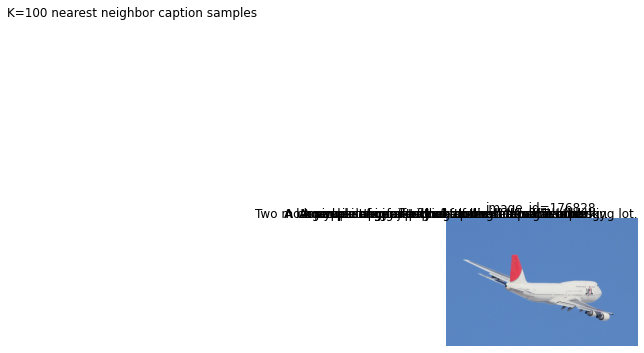

In [18]:
columns = 4

plt.figure(figsize=(18, 8))
plt.suptitle(f"K=100 nearest neighbor caption samples")
for idx, img_id in enumerate(sample_img_ids):
    img = sample_imgs[idx]
    plt.subplot(int(len(sample_img_ids) / columns + 1), columns, i + 1)
    plt.axis('off') 
    plt.title(f"image_id={img_id}")
    plt.text(0.5, 0.01, best_captions[idx], wrap=True, horizontalalignment='center', fontsize=12)
    plt.imshow(img)
    

In [ ]:
columns = 4
plt.figure(figsize=(18, 8))
plt.suptitle(f"K=20 nearest neighbors for image_id={cap_map[0]['image_id']}")
for i, img_id in enumerate(nearest_neighbors[0]):
    url = capgen.coco.coco.imgs[img_id]['coco_url']
    raw_img = Image.open(requests.get(url, stream=True).raw)

    plt.subplot(int(len(nearest_neighbors[0]) / columns + 1), columns, i + 1)
    plt.title(f'image_id={img_id}') 
    plt.axis('off')
    plt.imshow(raw_img)
plt.savefig("nn-results.png", bbox_inches='tight')